In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/testu/Downloads/apy.csv")
df[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0


In [3]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64

In [4]:
data = df.dropna()
print(data.shape)
test = df[~df["Production"].notna()].drop("Production",axis=1)
print(test.shape)

(242361, 7)
(3730, 6)


In [5]:
sum_maxp = data["Production"].sum()
data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)

C:\Users\testu\AppData\Local\Temp\ipykernel_9620\1048416122.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["percent_of_production"] = data["Production"].map(lambda x:(x/sum_maxp)*100)


In [6]:
data[:5]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0,1.416670e-06
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0,7.083351e-10
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0,2.273756e-07
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0,4.540428e-07
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0,1.168753e-07


<Axes: xlabel='Crop_Year', ylabel='Production'>

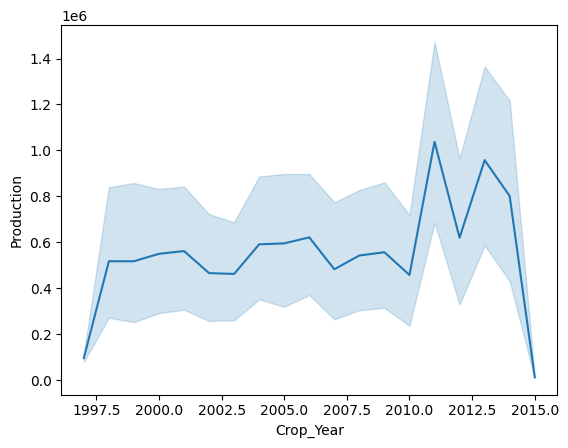

In [7]:
sns.lineplot(x=data["Crop_Year"], y=data["Production"])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 [Text(0, 0, 'Andaman and Nicobar Islands'),
  Text(1, 0, 'Andhra Pradesh'),
  Text(2, 0, 'Arunachal Pradesh'),
  Text(3, 0, 'Assam'),
  Text(4, 0, 'Bihar'),
  Text(5, 0, 'Chandigarh'),
  Text(6, 0, 'Chhattisgarh'),
  Text(7, 0, 'Dadra and Nagar Haveli'),
  Text(8, 0, 'Goa'),
  Text(9, 0, 'Gujarat'),
  Text(10, 0, 'Haryana'),
  Text(11, 0, 'Himachal Pradesh'),
  Text(12, 0, 'Jammu and Kashmir '),
  Text(13, 0, 'Jharkhand'),
  Text(14, 0, 'Karnataka'),
  Text(15, 0, 'Kerala'),
  Text(16, 0, 'Madhya Pradesh'),
  Text(17, 0, 'Maharashtra'),
  Text(18, 0, 'Manipur'),
  Text(19, 0, 'Meghalaya'),
  Text(20, 0, 'Mizoram'),
  Text(21, 0, 'Nagaland'),
  Text(22, 0, 'Odisha'),
  Text(23, 0, 'Puducherry'),
  Text(24, 0, 'Punjab'),
  Text(25, 0, 'Rajasthan'),
  Text(26, 0, 'Sikkim'),
  Text(27, 0, 'Tamil Nadu'),
  Text(28, 0, 'Telangana '),
  Text(29

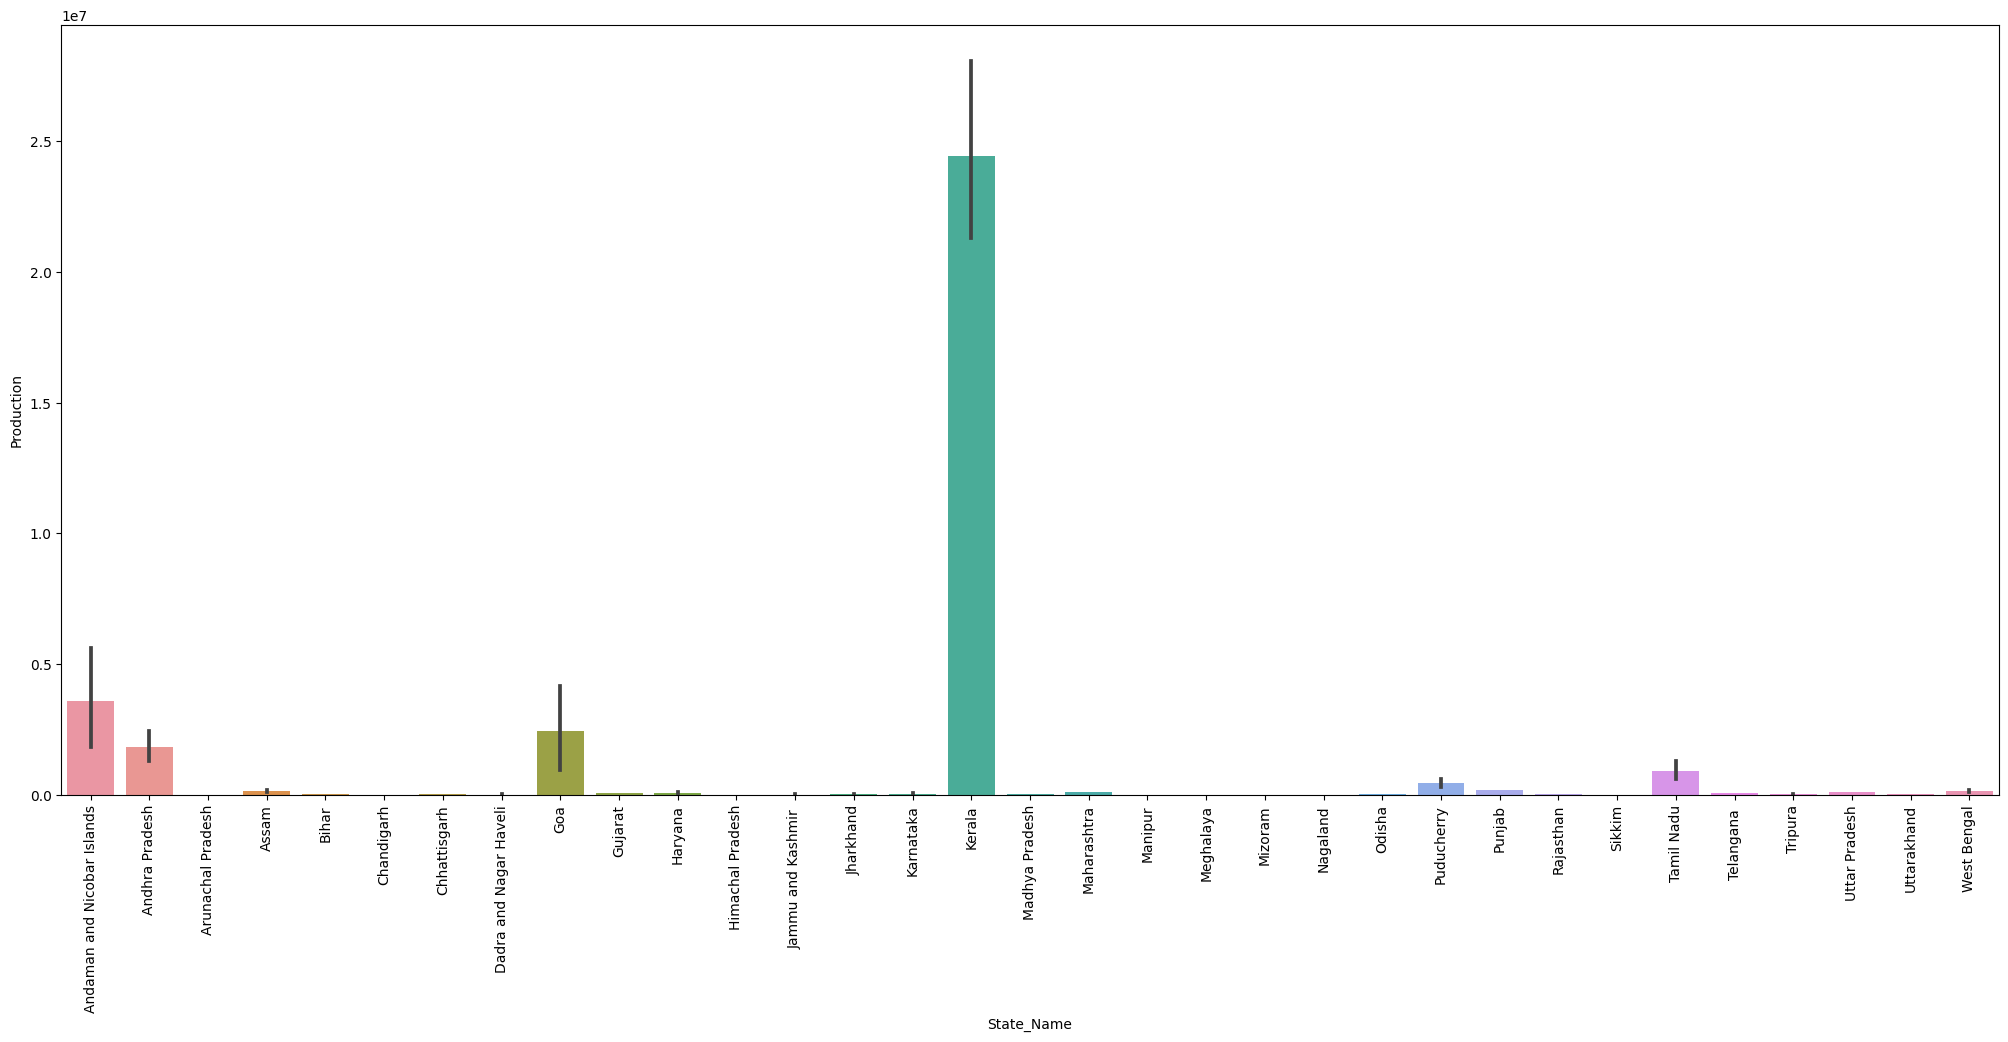

In [8]:
plt.figure(figsize=(25,10))
sns.barplot(x=data["State_Name"],y=data["Production"])
plt.xticks(rotation=90)

<Axes: xlabel='Season', ylabel='Production'>

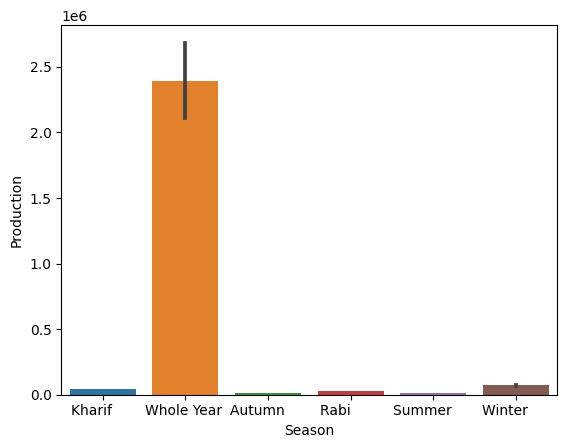

In [9]:
sns.barplot(x=data["Season"],y=data["Production"])

In [10]:
data.groupby("Season",axis=0).agg({"Production":np.sum})

,Production
Season,
Autumn,6.441377e+07
Kharif,4.029970e+09
Rabi,2.051688e+09
Summer,1.706579e+08
Whole Year,1.344248e+11
Winter,4.345498e+08


In [11]:
data["Crop"].value_counts()[:5]

Rice                 15082
Maize                13787
Moong(Green Gram)    10106
Urad                  9710
Sesamum               8821
Name: Crop, dtype: int64

In [12]:
top_crop_pro = data.groupby("Crop")["Production"].sum().reset_index().sort_values(by='Production',ascending=False)
top_crop_pro[:5]

,Crop,Production
28,Coconut,1.299816e+11
106,Sugarcane,5.535682e+09
95,Rice,1.605470e+09
119,Wheat,1.332826e+09
87,Potato,4.248263e+08


# 1.Rice

In [13]:
rice_df = data[data["Crop"]=="Rice"]
print(rice_df.shape)
rice_df[:3]

(15082, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.00,2.273756e-07
12,Andaman and Nicobar Islands,NICOBARS,2001,Kharif,Rice,83.0,300.00,2.125005e-07
18,Andaman and Nicobar Islands,NICOBARS,2002,Kharif,Rice,189.2,510.84,3.618459e-07


<Axes: xlabel='Season', ylabel='Production'>

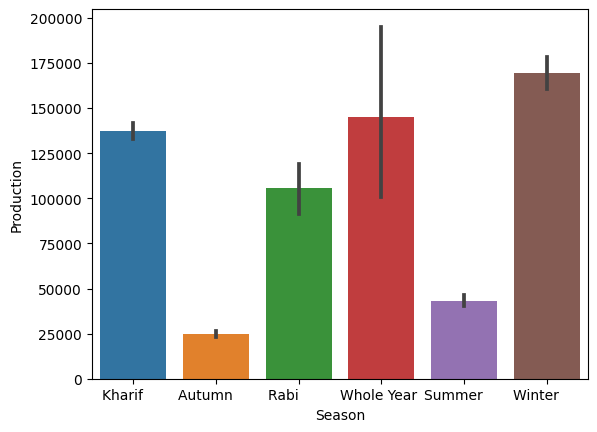

In [14]:
sns.barplot(x='Season', y='Production', data=rice_df)

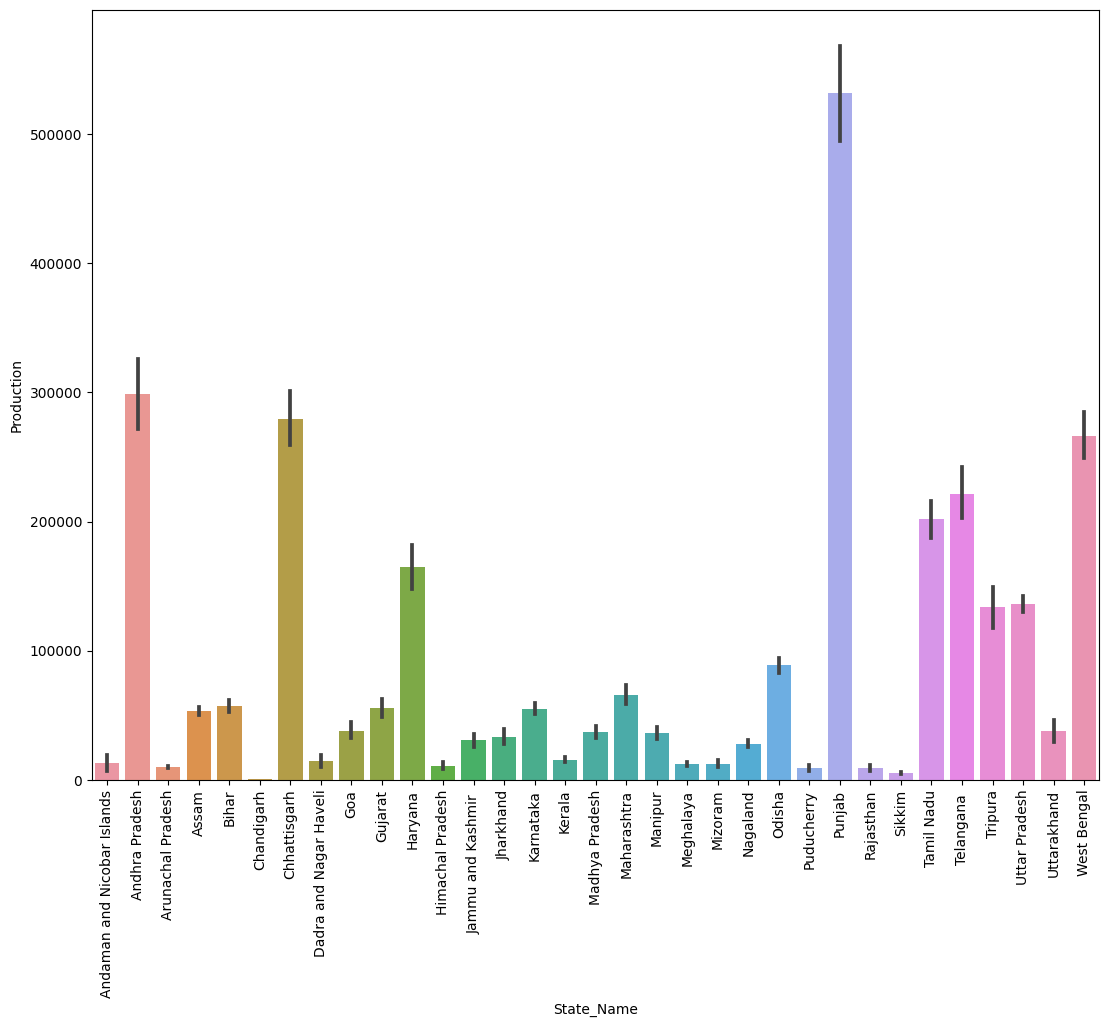

In [15]:
plt.figure(figsize=(13,10))
sns.barplot(x="State_Name",y="Production",data=rice_df)
plt.xticks(rotation=90)
plt.show()

In [16]:
top_rice_pro_dis = rice_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_rice_pro_dis[:5]
sum_max = top_rice_pro_dis["Production"].sum()
top_rice_pro_dis["precent_of_pro"] = top_rice_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_rice_pro_dis[:5]

,District_Name,Production,precent_of_pro
58,BARDHAMAN,34239976.0,2.132707
374,MEDINIPUR WEST,29192719.0,1.818328
612,WEST GODAVARI,27845309.0,1.734402
169,EAST GODAVARI,24690929.0,1.537925
494,SANGRUR,24448000.0,1.522794


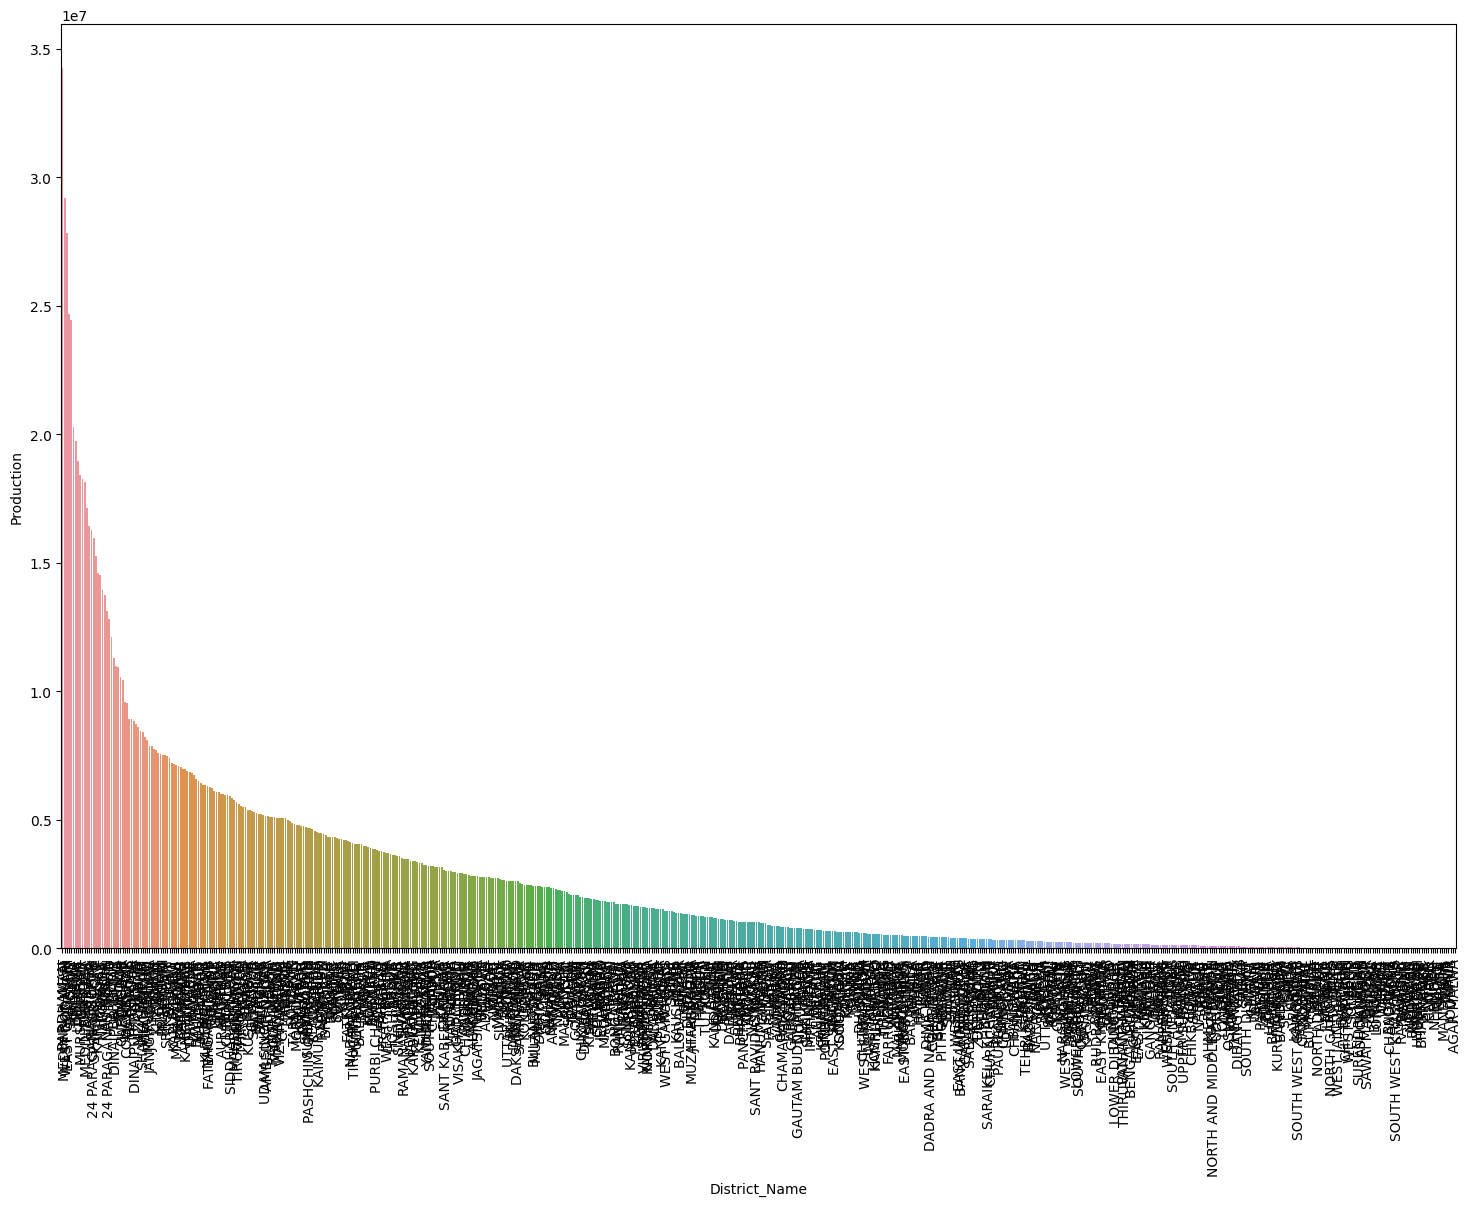

In [17]:
plt.figure(figsize=(18,12))
sns.barplot(x="District_Name",y="Production",data=top_rice_pro_dis)
plt.xticks(rotation=90)
plt.show()

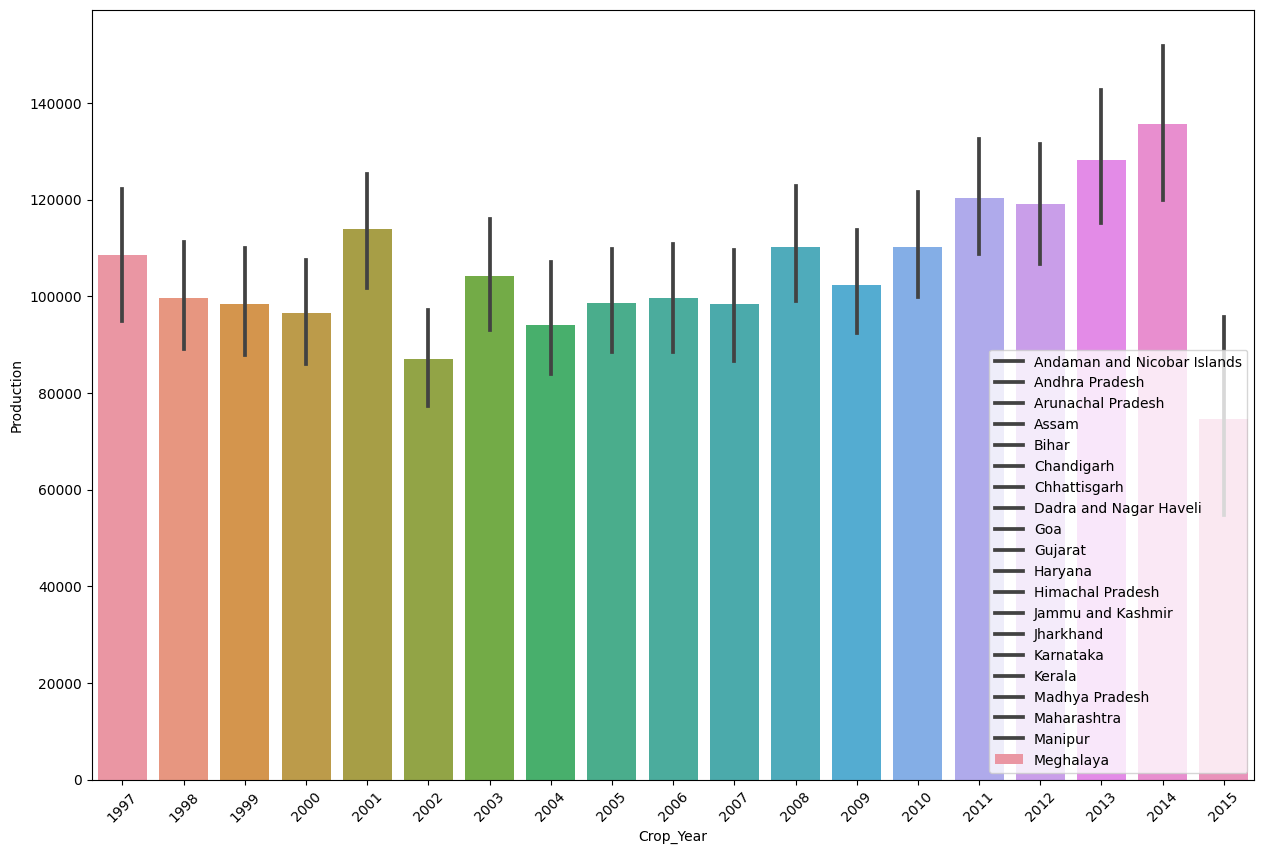

In [18]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=rice_df)
plt.xticks(rotation=45)
plt.legend(rice_df['State_Name'].unique())
plt.show()

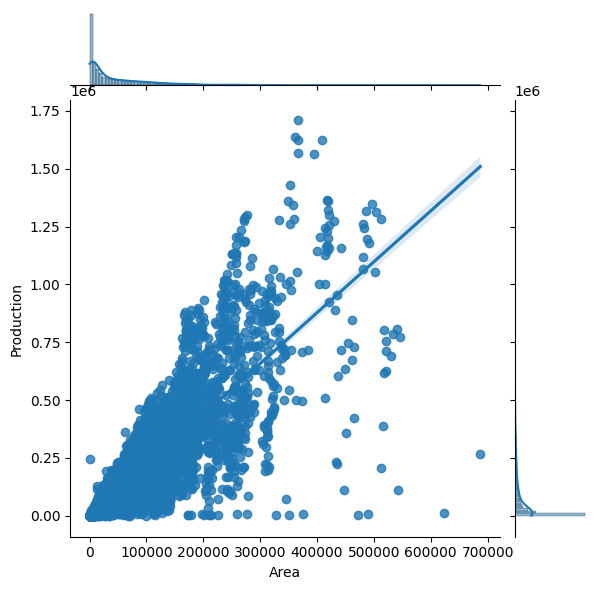

In [19]:
sns.jointplot(x="Area",y="Production",data=rice_df,kind="reg")

# 2.Sugarcane

In [20]:
sug_df = data[data["Crop"]=="Sugarcane"]
print(sug_df.shape)
sug_df[:3]

(7827, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
7,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Sugarcane,1.0,2.0,1.416670e-09
16,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Sugarcane,1.0,1.0,7.083351e-10
26,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Sugarcane,5.0,40.0,2.833340e-08


<Axes: xlabel='Season', ylabel='Production'>

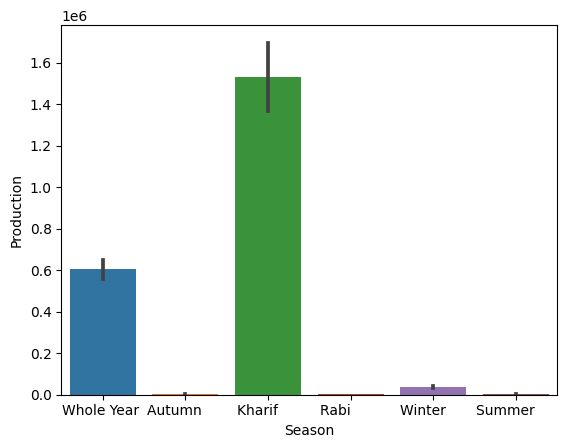

In [21]:
sns.barplot(x="Season",y="Production",data=sug_df)

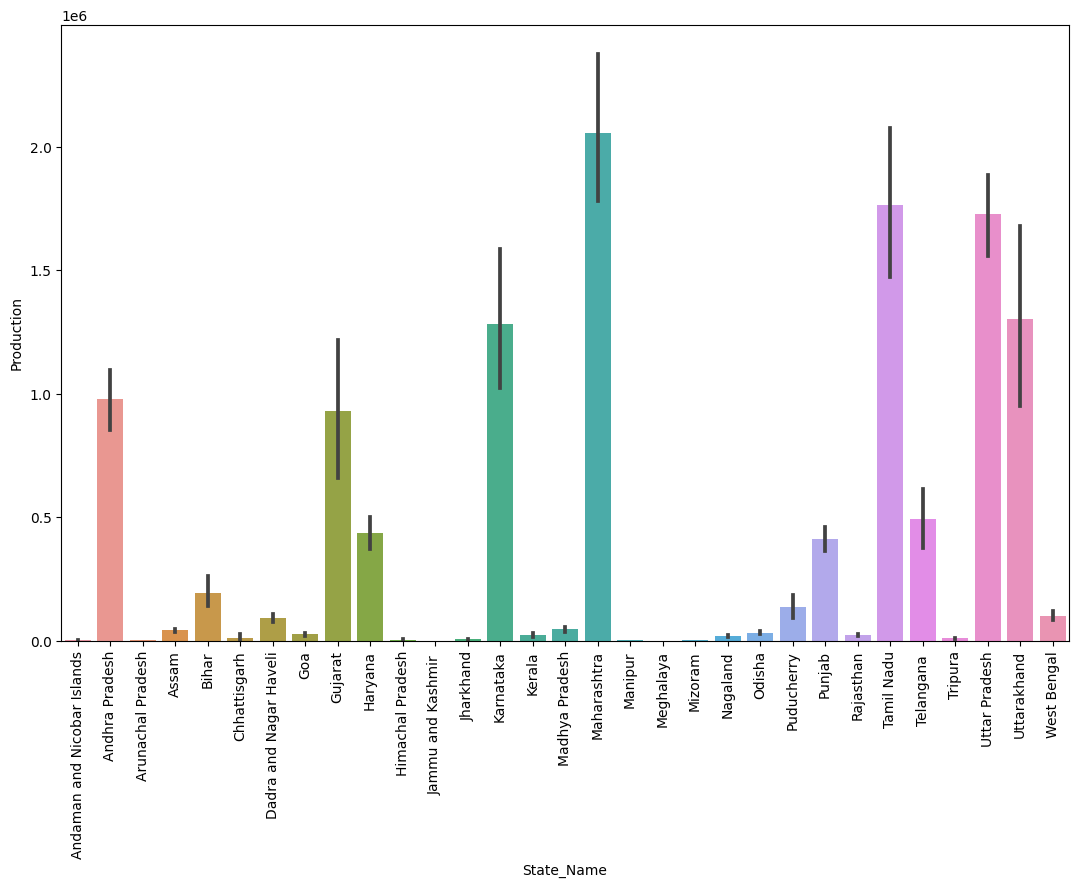

In [22]:
plt.figure(figsize=(13,8))
sns.barplot(x="State_Name",y="Production",data=sug_df)
plt.xticks(rotation=90)
plt.show()

In [23]:
top_sug_pro_dis = sug_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_sug_pro_dis[:5]
sum_max = top_sug_pro_dis["Production"].sum()
top_sug_pro_dis["precent_of_pro"] = top_sug_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_sug_pro_dis[:5]

,District_Name,Production,precent_of_pro
360,MUZAFFARNAGAR,258698795.0,4.673296
81,BIJNOR,230907185.0,4.171251
283,KHERI,224383685.0,4.053407
63,BELGAUM,198207649.0,3.580546
294,KOLHAPUR,157210426.0,2.839947


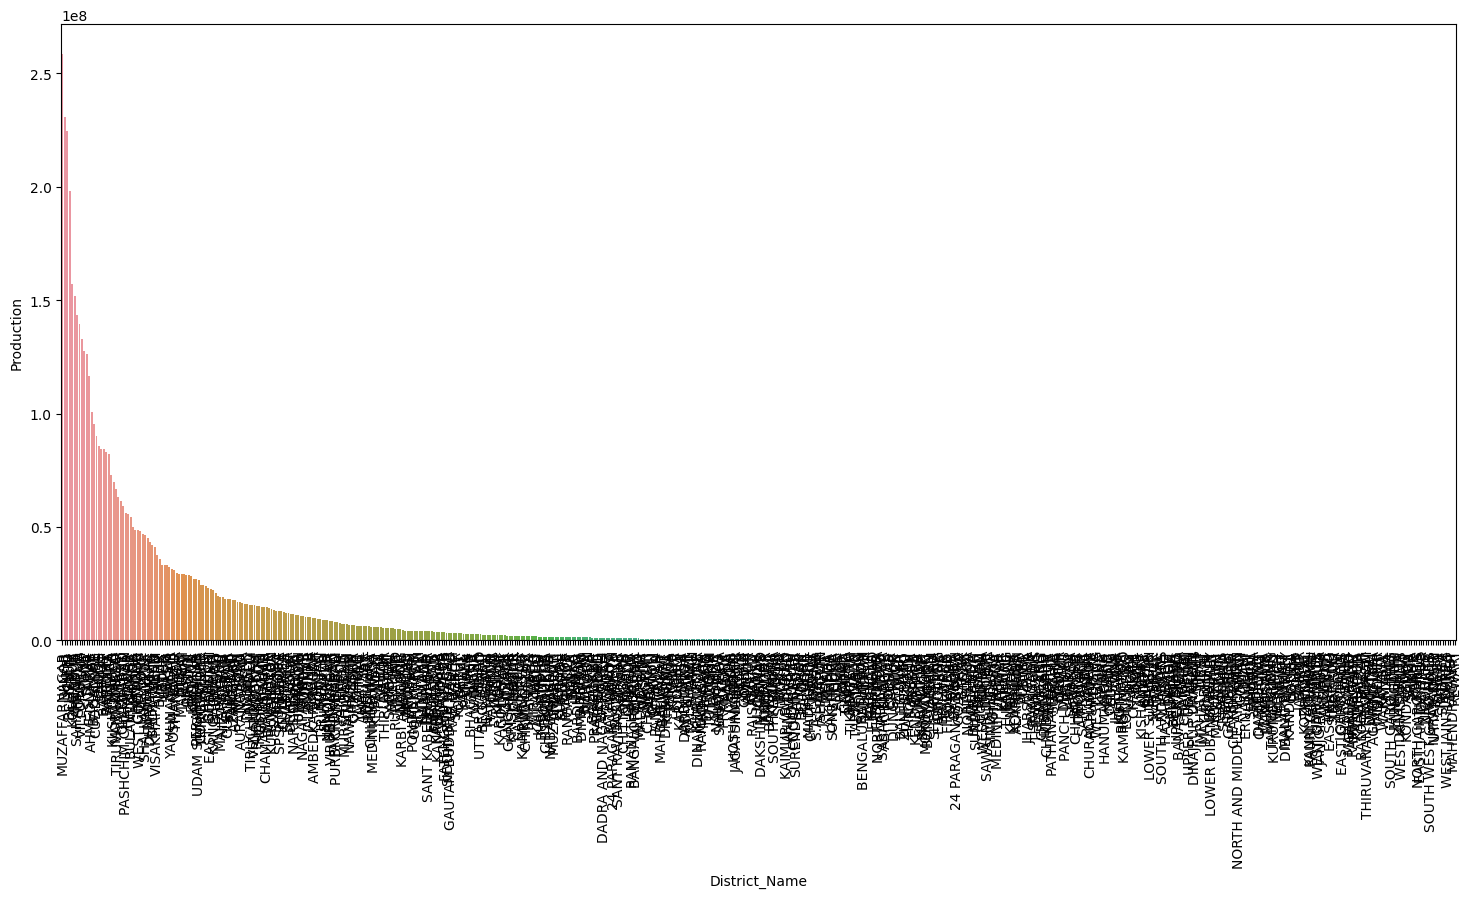

In [24]:
plt.figure(figsize=(18,8))
sns.barplot(x="District_Name",y="Production",data=top_sug_pro_dis)
plt.xticks(rotation=90)
plt.show()

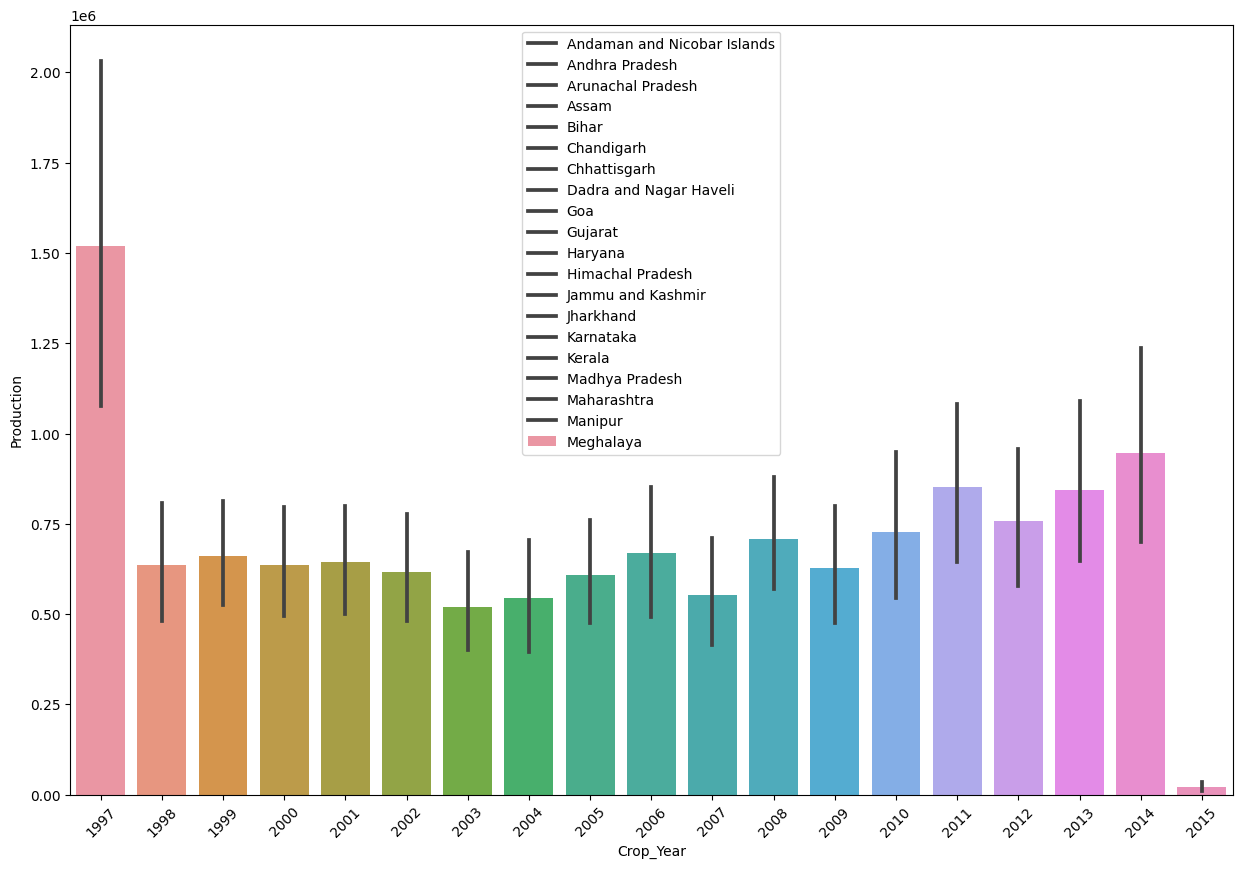

In [25]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=sug_df)
plt.xticks(rotation=45)
plt.legend(rice_df['State_Name'].unique())
plt.show()

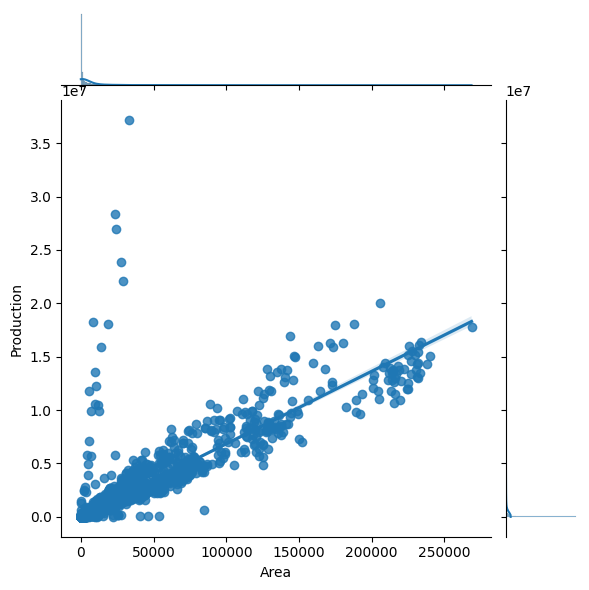

In [26]:
sns.jointplot(x="Area",y="Production",data=sug_df,kind="reg")

# 3.Coconut

In [27]:
coc_df = data[data["Crop"]=="Coconut "]
print(coc_df.shape)
coc_df[:3]

(1958, 8)


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production,percent_of_production
5,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Coconut,18168.0,65100000.0,0.046113
14,Andaman and Nicobar Islands,NICOBARS,2001,Whole Year,Coconut,18190.0,64430000.0,0.045638
23,Andaman and Nicobar Islands,NICOBARS,2002,Whole Year,Coconut,18240.0,67490000.0,0.047806


<Axes: xlabel='Season', ylabel='Production'>

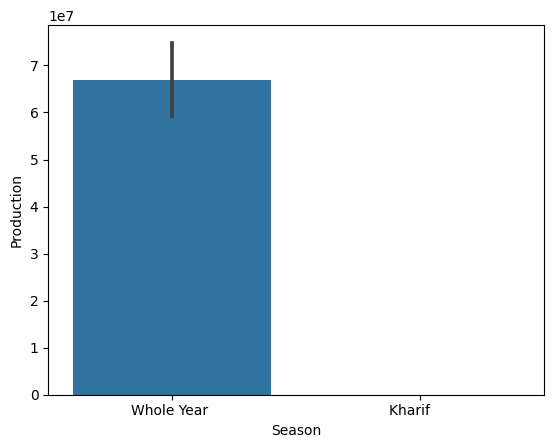

In [28]:
sns.barplot(x="Season",y="Production",data=coc_df)

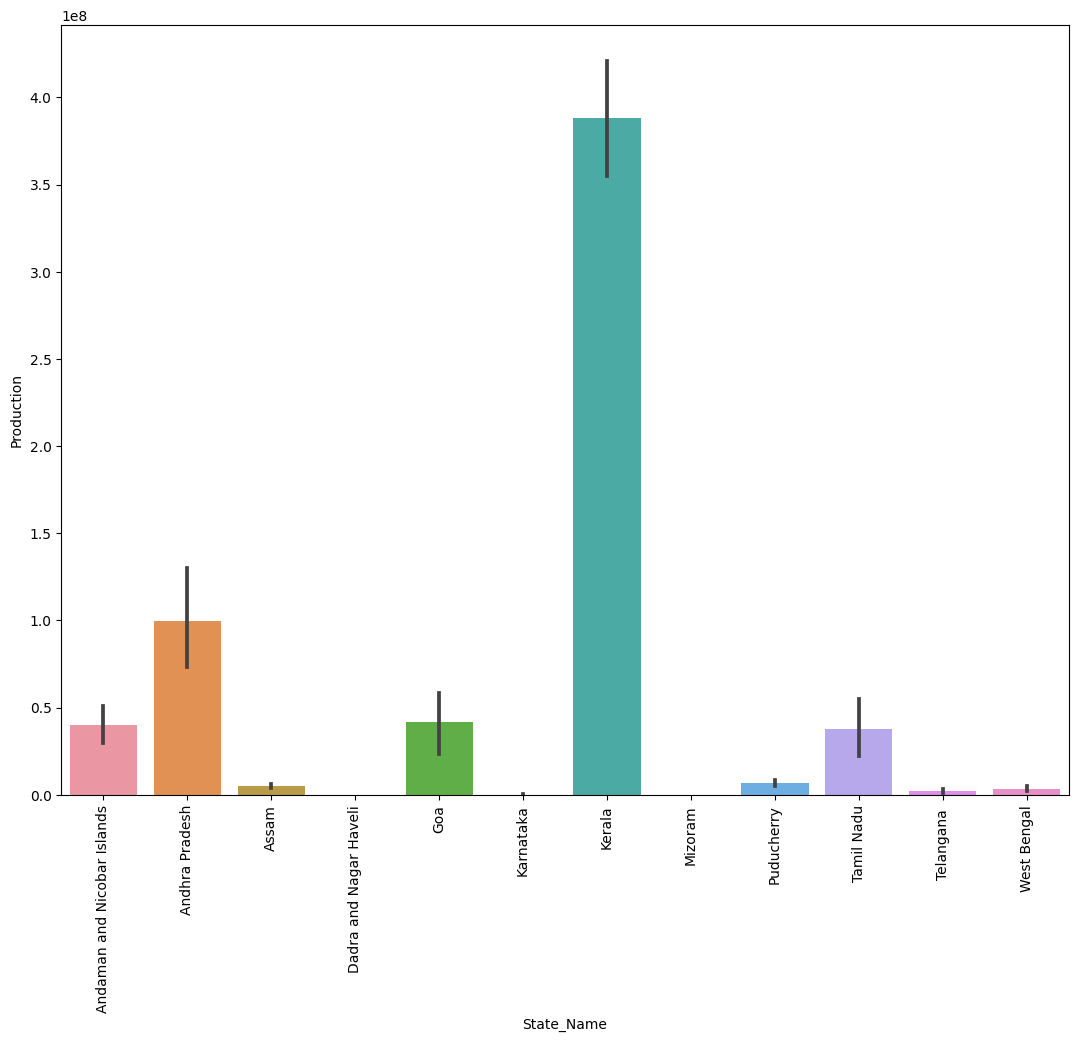

In [29]:
plt.figure(figsize=(13,10))
sns.barplot(x="State_Name",y="Production",data=coc_df)
plt.xticks(rotation=90)
plt.show()

In [30]:
top_coc_pro_dis = coc_df.groupby("District_Name")["Production"].sum().reset_index().sort_values(
    by='Production',ascending=False)
top_coc_pro_dis[:5]
sum_max = top_coc_pro_dis["Production"].sum()
top_coc_pro_dis["precent_of_pro"] = top_coc_pro_dis["Production"].map(lambda x:(x/sum_max)*100)
top_coc_pro_dis[:5]

,District_Name,Production,precent_of_pro
77,KOZHIKODE,1.527871e+10,11.754512
86,MALAPPURAM,1.451252e+10,11.165052
129,THIRUVANANTHAPURAM,1.001337e+10,7.703678
131,THRISSUR,9.920739e+09,7.632416
64,KANNUR,9.780310e+09,7.524379


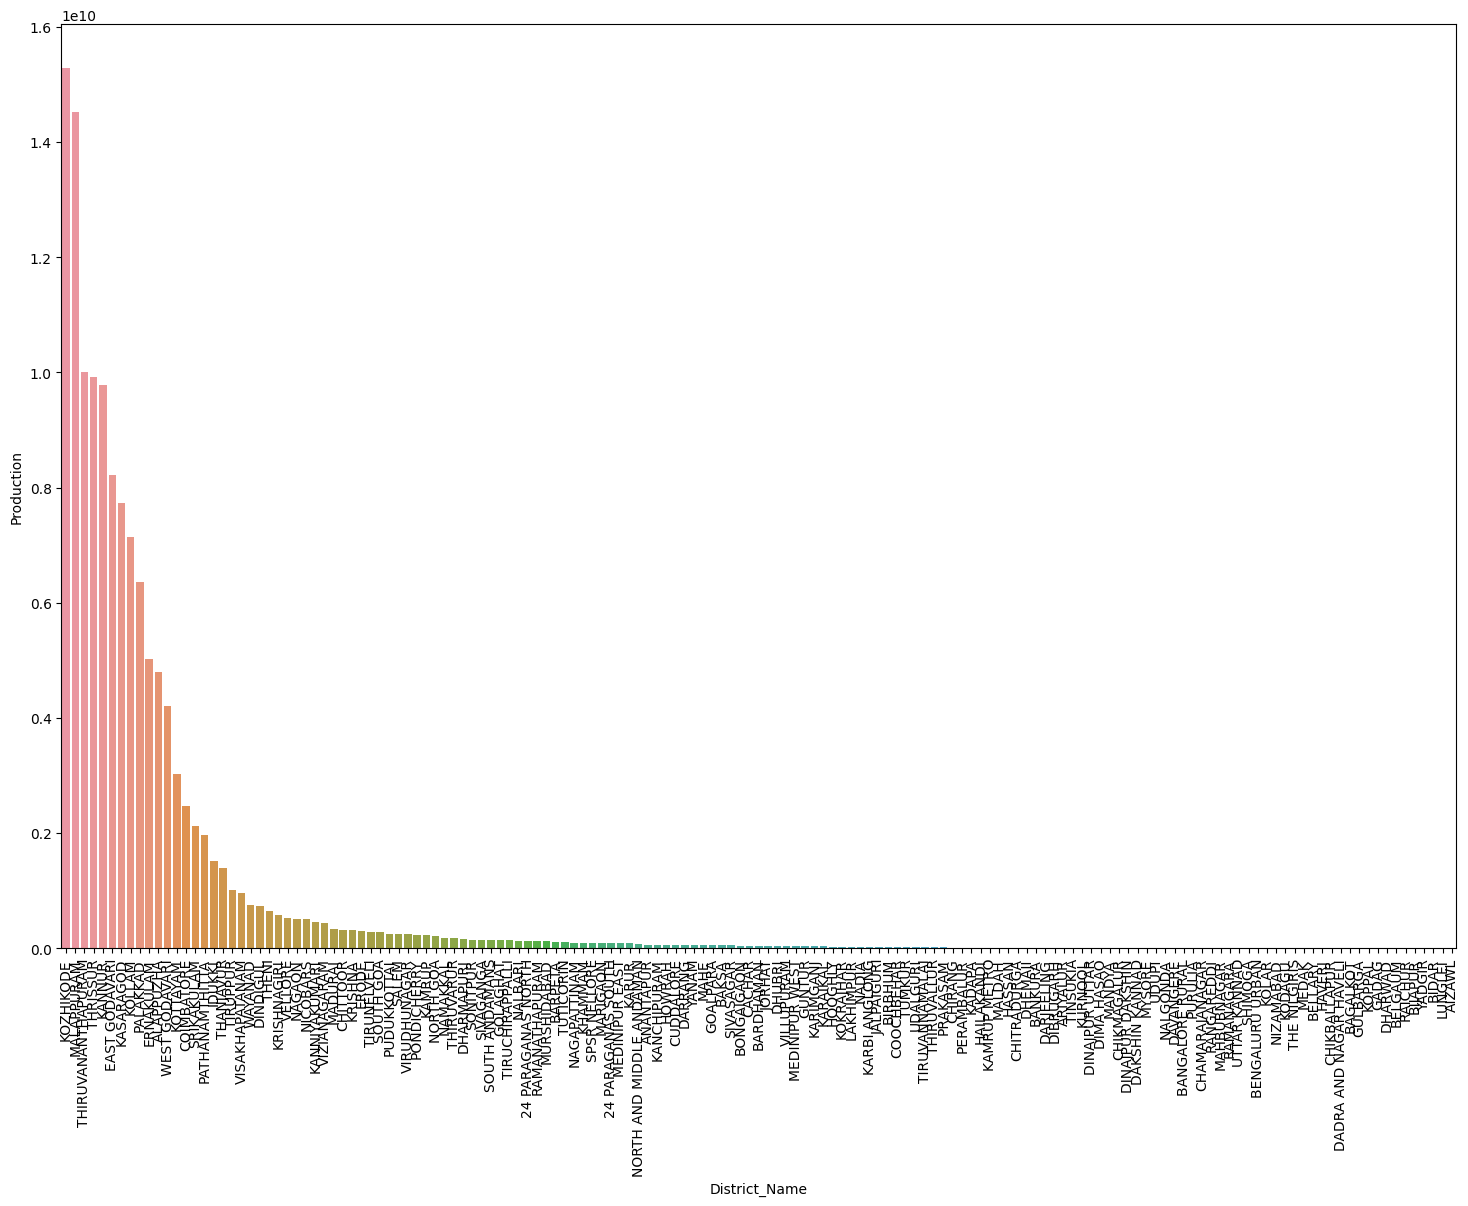

In [31]:
plt.figure(figsize=(18,12))
sns.barplot(x="District_Name",y="Production",data=top_coc_pro_dis)
plt.xticks(rotation=90)
plt.show()

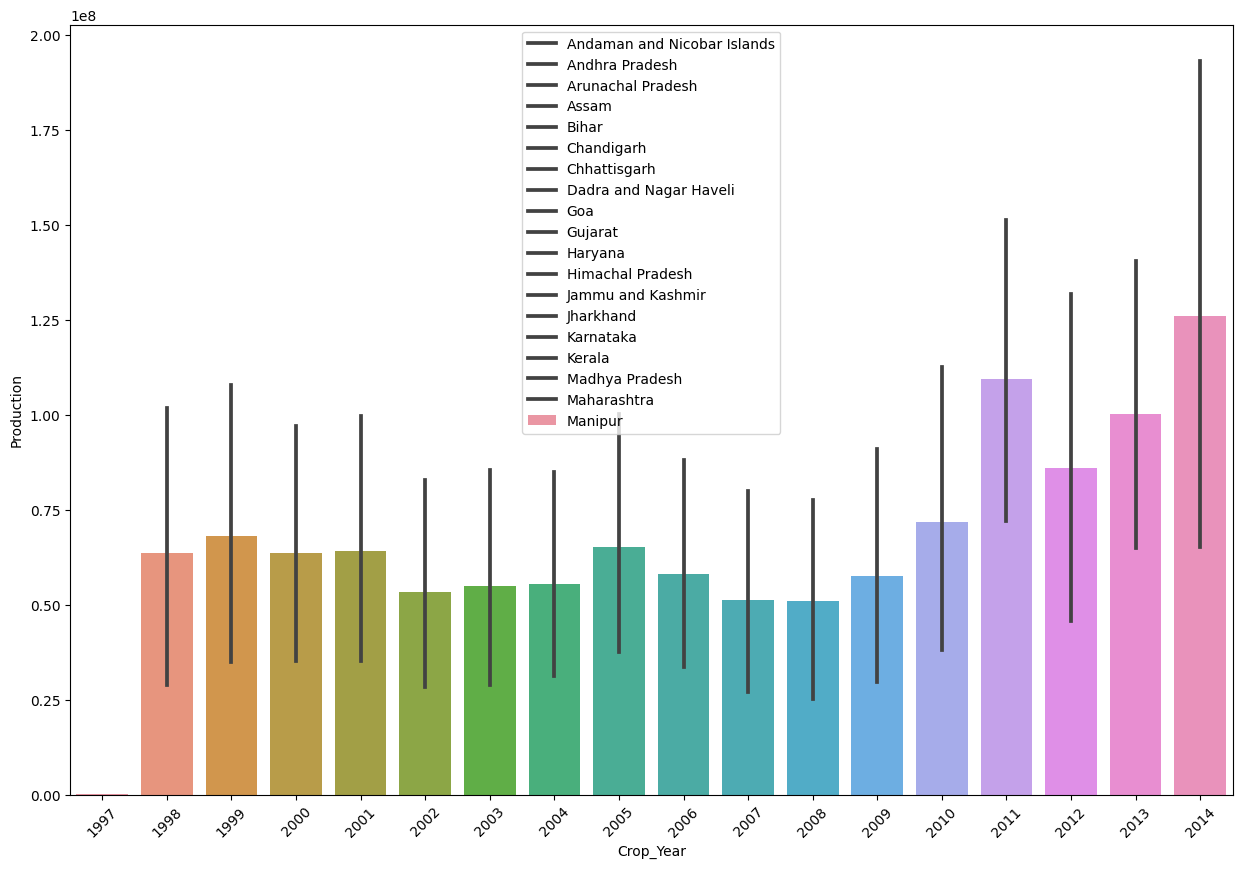

In [32]:
plt.figure(figsize=(15,10))
sns.barplot(x="Crop_Year",y="Production",data=coc_df)
plt.xticks(rotation=45)
plt.legend(rice_df['State_Name'].unique())
plt.show()

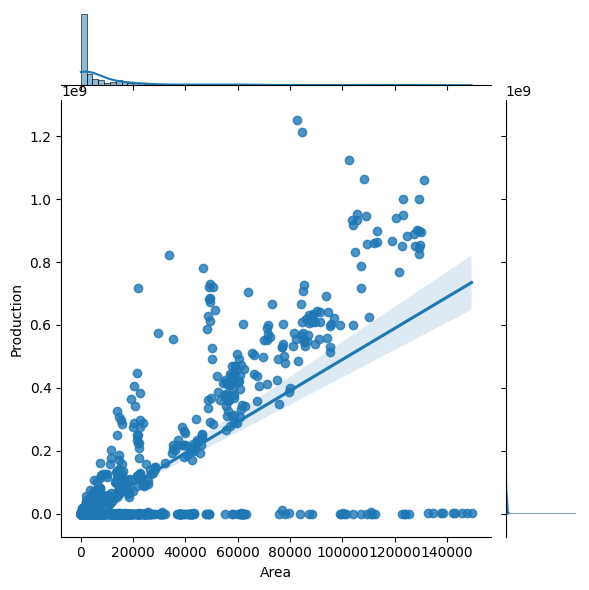

In [33]:
sns.jointplot(x="Area",y="Production",data=coc_df,kind="reg")

# Feature Selection

In [34]:
data1 = data.drop(["District_Name","Crop_Year"],axis=1)

In [35]:
data_dum = pd.get_dummies(data1)
data_dum[:5]

,Area,Production,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
0,1254.0,2000.0,1.416670e-06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2.0,1.0,7.083351e-10,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,102.0,321.0,2.273756e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,176.0,641.0,4.540428e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,720.0,165.0,1.168753e-07,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Test Train Split

In [36]:
x = data_dum.drop("Production",axis=1)
y = data_dum[["Production"]]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33, random_state=42)
print("x_train :",x_train.shape)
print("x_test :",x_test.shape)
print("y_train :",y_train.shape)
print("y_test :",y_test.shape)

x_train : (162381, 165)
x_test : (79980, 165)
y_train : (162381, 1)
y_test : (79980, 1)


In [37]:
x_train[:5]

,Area,percent_of_production,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Dadra and Nagar Haveli,...,Crop_Turmeric,Crop_Turnip,Crop_Urad,Crop_Varagu,Crop_Water Melon,Crop_Wheat,Crop_Yam,Crop_other fibres,Crop_other misc. pulses,Crop_other oilseeds
4843,785.0,1.486087e-06,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20626,1250.0,5.829598e-07,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
240277,2.0,1.452087e-07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
20664,60.0,4.646678e-07,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
157859,605.0,6.729184e-08,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Model 1: Random Forest

In [38]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)
preds = model.predict(x_test)

C:\Users\testu\AppData\Local\Temp\ipykernel_9620\451284859.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model.fit(x_train,y_train)


In [39]:
from sklearn.metrics import r2_score
r = r2_score(y_test,preds)
print("R2score: ",r)

R2score:  0.9979655568724228


In [40]:
# Calculate accuracy
accuracy = (r + 1) / 2
print("accuracy:", accuracy)

accuracy: 0.9989827784362114


# Model 2: XGBRegressor

In [41]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xgbr = xgb.XGBRegressor(verbosity=0) 
xgbr.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [42]:
preds = xgbr.predict(x_test)

mse = mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 376142356029.7815
R2 Score: 0.9988263359928332


In [43]:
# Calculate accuracy
accuracy = (r2 + 1) / 2
print("accuracy:", accuracy)

accuracy: 0.9994131679964167


# Model 3: Decision Tree

In [44]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [45]:
preds = regressor.predict(x_test)

mse = mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 327520227162.98267
R2 Score: 0.9989780499428523


In [46]:
# Calculate accuracy
accuracy = (r2 + 1) / 2
print("accuracy:", accuracy)

accuracy: 0.9994890249714261


# Model 4 : Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [48]:
preds = model.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test,preds)
r2 = r2_score(y_test,preds)
print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 2.127237709093492e-09
R2 Score: 1.0


In [50]:
# Calculate accuracy
accuracy = (r2 + 1) / 2
print("accuracy:", accuracy)

accuracy: 1.0


# Model 5: Ridge Regression

In [51]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

ridge = Ridge(alpha=1.0)
ridge.fit(x_train, y_train.values.ravel())

preds = ridge.predict(x_test)

mse = mean_squared_error(y_test, preds)
r2 = r2_score(y_test, preds)

print("Mean Squared Error:", mse)
print("R2 Score:", r2)

Mean Squared Error: 676878522277.0989
R2 Score: 0.9978879593162383


In [52]:
# Calculate accuracy
accuracy = (r2 + 1) / 2
print("accuracy:", accuracy)

accuracy: 0.9989439796581192


# Prediction
Model 3: Decision Tree has high r2score when compare to other model

In [48]:
tst = test.drop(["District_Name","Crop_Year"],axis=1)
tst_dum = pd.get_dummies(tst)
tst_dum[:5]

,Area,State_Name_Andaman and Nicobar Islands,State_Name_Andhra Pradesh,State_Name_Arunachal Pradesh,State_Name_Assam,State_Name_Bihar,State_Name_Chandigarh,State_Name_Chhattisgarh,State_Name_Goa,State_Name_Gujarat,...,Crop_Soyabean,Crop_Sugarcane,Crop_Sunflower,Crop_Sweet potato,Crop_Tapioca,Crop_Tobacco,Crop_Turmeric,Crop_Urad,Crop_Wheat,Crop_other oilseeds
46,795.67,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51,17.00,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
623,1000.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
630,1000.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
698,8.00,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
y_test = tst_dum.copy()
print(x_train.shape)
print(y_test.shape)

(162381, 165)
(3730, 92)


In [50]:
def common_member(x_train,x_test): 
    a_set =  set(x_train.columns.tolist())
    b_set =  set(x_test.columns.tolist())
    if (a_set & b_set): 
        return list(a_set & b_set) 

In [51]:
com_fea = common_member(x_train,tst_dum)
len(com_fea)

92

In [52]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(x_train[com_fea],y_train)
preds = regressor.predict(y_test[com_fea])

In [53]:
preds

array([ 752.,   16., 1000., ...,  100.,  540.,    1.])

In [54]:
test["production"] = preds

In [55]:
test[:10]

,State_Name,District_Name,Crop_Year,Season,Crop,Area,production
46,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Arecanut,795.67,752.0
51,Andaman and Nicobar Islands,NICOBARS,2005,Whole Year,Dry chillies,17.00,16.0
623,Andhra Pradesh,ANANTAPUR,2007,Kharif,Moong(Green Gram),1000.00,1000.0
630,Andhra Pradesh,ANANTAPUR,2007,Rabi,Horse-gram,1000.00,1000.0
698,Andhra Pradesh,ANANTAPUR,2009,Rabi,Rapeseed &Mustard,8.00,4.0
723,Andhra Pradesh,ANANTAPUR,2010,Kharif,Other Kharif pulses,1.00,15.0
1153,Andhra Pradesh,CHITTOOR,2001,Rabi,Wheat,4.00,4.5
1317,Andhra Pradesh,CHITTOOR,2004,Rabi,Wheat,2.00,2.0
1419,Andhra Pradesh,CHITTOOR,2007,Kharif,Moong(Green Gram),1000.00,1000.0
1423,Andhra Pradesh,CHITTOOR,2007,Kharif,Small millets,1000.00,1000.0
